In [2]:
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math

In [3]:
# csv file name
f = ["Set1.csv","Set2.csv"]

In [4]:
data = []
for i in range(len(f)):
    with open(f[i], newline='') as file:
        rows = csv.reader(file)
        #Ignore header
        headers = next(rows, None)
        temp_data = []
        for row in rows:
            temp_data.append(float(row[0]))
        data.append(np.array(temp_data))
print(len(data[0]),len(data[1]))

100 30


# MLE of Normal Distribution
Fit data by $N(\mu,\sigma^2)$, pdf $f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$  
Theoretical derivation:
$$L(\mu,\sigma^2|data) = \Pi^n_{i=1}f(x_i|\mu,\sigma^2)$$  
$$=\Pi^n_{i=1}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$$ $$=(\frac{1}{\sqrt{2\pi\sigma^2}})^ne^{-\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^2}}$$  
$$(\hat{\mu}_{MLE},\hat{\sigma^2}_{MLE}) = \arg L(\mu,\sigma^2|data)=\arg \ln L(\mu,\sigma^2|data)$$  
$$l = \ln L(\mu,\sigma^2|data) = -\frac{n}{2}\ln(2\pi\sigma^2)-\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^2}$$  
$$\begin{cases} \frac{\partial l}{\partial\mu}=\frac{2\sum^n_{i=1}(x_i-\mu)}{2\sigma^2} = \frac{\sum^n_{i=1}(x_i-\mu)}{\sigma^2}\overset{Letting}{=} 0 \rightarrow(1)\\ \frac{\partial l}{\partial\sigma^2}=-\frac{n\times 2\pi}{2\times 2\pi\sigma^2}+\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^4}=\frac{-n\sigma^2+\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^4} \overset{Letting}{=} 0\rightarrow(2)\end{cases}$$  
$$From\space (1), {\sum^n_{i=1}(x_i-\hat{\mu}_{MLE})}=0$$
$$\sum^n_{i=1}(x_i)-n*\hat{\mu}_{MLE}=0$$  
$$\therefore\hat{\mu}_{MLE} = \frac{\sum^n_{i=1}(x_i)}{n} = \bar{x}$$  
$$From\space (2), -n\hat{\sigma}_{MLE}^2+\sum^n_{i=1}(x_i-\bar{x})^2 = 0$$  
$$\therefore\hat{\sigma}_{MLE}^2 = \frac{\sum^n_{i=1}(x_i-\bar{x})^2}{n}$$  


In [5]:
def MLE_normal(data):
    mu = np.mean(data)
    sigma_square = np.var(data)
    return mu,sigma_square

In [8]:
mu,sigma_square = MLE_normal(data[0])
sigma = math.sqrt(sigma_square)

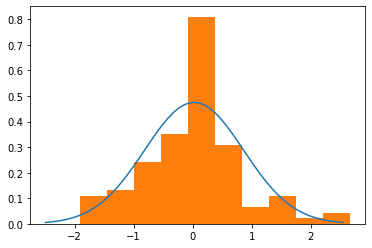

In [9]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.hist(data[0],density = True)
plt.show()

# MLE of Exponential Distribution
Fit data by $exp(\lambda)$,pdf $f(x)=\lambda e^{-\lambda x}$

By Theoretical derivation:
$$L(\lambda|data) = \Pi^n_{j=1}f(x|\lambda)=\Pi^n_{j=1}\lambda e^{-\lambda x_j}$$
$$=\lambda^ne^{-\lambda\sum^n_{j=1}x_j}$$
$$l = \ln L = n\ln{\lambda}-\lambda\sum^n_{j=1}x_j$$
$$\frac{\partial l}{\partial \lambda} = \frac{n}{\lambda} - \sum^n_{j=1}x_j \overset{Letting}{=} 0$$
$$\therefore\hat{\lambda}_{MLE} = \frac{n}{\sum^n_{j=1}x_j} = \frac{1}{\bar{x}}$$

In [10]:
def MLE_exp(data):
    mu = np.mean(data)
    Lambda = 1/mu
    return Lambda

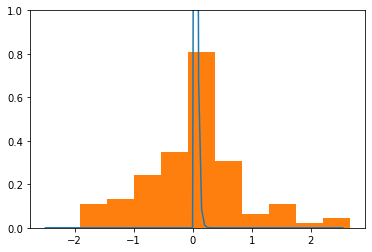

In [11]:
Lambda = MLE_exp(data[0])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.expon.pdf(x, scale = 1/Lambda))
plt.hist(data[0],density = True)
plt.ylim(top=1)
plt.show()

# MLE of Laplace Distribution
Fit data by $Laplace(\mu,b)$, pdf $f(x) = \frac{1}{2b}e^{-\frac{|x-\mu|}{b}}$

Theoretical derivation:
$$L(\mu,b|data) = \Pi^n_{i=1}f(x|\mu,b) = \Pi^n_{i=1}\frac{1}{2b}e^{-\frac{|x_i-\mu|}{b}}$$
$$=\frac{1}{(2b)^n}e^{\sum^n_{i=1}-\frac{|x_i-\mu|}{b}}$$
$$l = \ln L = -n\ln{2b}-\sum^n_{i=1}\frac{|x_i-\mu|}{b}=-n\ln{2b}-\frac{1}{b}\sum^n_{i=1}|x_i-\mu|$$
$$\begin{cases}\frac{\partial l}{\partial \mu} = \frac{n}{b}\sum^n_{i=1}\frac{x_i-\mu}{|x_i-\mu|}\overset{Letting}{=}0\rightarrow (1)\\\frac{\partial l}{\partial b} =-\frac{2n}{2b}+\frac{1}{b^2}\sum^n_{i=1}|x_i-\mu|=\frac{n}{b}(-1+\frac{\sum^n_{i=1}|x_i-\mu|}{nb}）\overset{Letting}{=}0\rightarrow (2)\end{cases}$$
$$From\space (1), \sum^n_{i=1}\frac{x_i-\hat{\mu}_{MLE}}{|x_i-\hat{\mu}_{MLE}|}=0$$
$$\sum^n_{i=1}sgn(x_i-\hat{\mu}_{MLE}) = 0$$
**Case 1: n is odd**
$$when\space \mu = median(data), \sum^n_{i=1}sgn(x_i-\mu) = sgn(median(data)-\mu) \rightarrow 0$$
**Case 2: n is even**
$$when\space \mu=median(data)=\frac{x_{\frac{n}{2}}+x_{\frac{n+1}{2}}}{2},\sum^n_{i=1}sgn(x_i-\mu)=sgn(x_{\frac{n}{2}}-\mu) + sgn(x_{\frac{n+1}{2}}-\mu) = 0$$
$$\therefore\hat{\mu}_{MLE} = median(data) $$
$$From\space (2),\frac{\sum^n_{i=1}|x_i-\mu|}{n\hat{b}_{MLE}}=1$$
$$\therefore \hat{b}_{MLE} = \frac{1}{n}\sum^n_{i=1}|x_i-\mu|$$
$$\therefore\begin{cases}\hat{\mu}_{MLE} = median(data)\\\hat{b}_{MLE} = \frac{1}{n}\sum^n_{i=1}|x_i-\mu|\end{cases}$$

Check convexity:
$$\frac{\partial^2l}{d\mu^2} = \frac{n}{b}\sum^n_{i=1}\frac{-|x_i-\mu|+(x_i-\mu)\frac{(x_i-\mu)}{|x_i-\mu|}}{(x_i-\mu)^2}=\frac{n}{b}\sum^n_{i=1}\frac{\frac{-(x_i-\mu)^2+(x_i-\mu)^2}{|x_i-\mu|}}{(x_i-\mu)^2}=0$$
$$\therefore\space l\space is\space convex$$

In [16]:
def MLE_lap(data):
    mu = np.median(data)
    b = 0
    for x in data:
        b+=abs(x-mu)
    b /= len(data)
    return mu,b

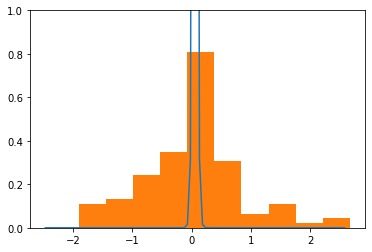

In [14]:
mu,b = MLE_lap(data[0])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.laplace.pdf(x, loc = mu, scale = 1/b))
plt.hist(data[0],density = True)
plt.ylim(top=1)
plt.show()

In [15]:
mu,b

(0.05400466649999999, 59.51408534399999)